In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/nasa-nearest-earth-objects'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 

#Added Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Disabled Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the Dataset
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv')

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


Lets add NaN Values:

In [4]:
import random

def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
    
    return df_missing

# Add NaN Values
df_with_nan = add_random_missing_values(df, missing_rate=0.05)

In [5]:
# Orijinal veri setindeki eksik değer sayısı
print("Orijinal veri setindeki eksik değer sayısı:", df.isna().sum().sum())

# NaN eklenmiş veri setindeki eksik değer sayısı
print("\nNaN eklenmiş veri setindeki eksik değer sayısı:", df_with_nan.isna().sum().sum())

# Veri setinin ilk 5 satırını görelim
print("\nVeri setinin ilk 5 satırı:")
print(df_with_nan.head())

Orijinal veri setindeki eksik değer sayısı: 0

NaN eklenmiş veri setindeki eksik değer sayısı: 44325

Veri setinin ilk 5 satırı:
          id                 name  est_diameter_min  est_diameter_max  \
0  2162635.0  162635 (2000 SS164)          1.198271          2.679415   
1  2277475.0    277475 (2005 WK4)          0.265800          0.594347   
2  2512244.0   512244 (2015 YE18)          0.722030          1.614507   
3        NaN          (2012 BV13)          0.096506               NaN   
4  3667127.0          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body sentry_object  \
0       13569.249224   5.483974e+07         Earth         False   
1       73588.726663   6.143813e+07         Earth         False   
2      114258.692129   4.979872e+07         Earth         False   
3       24764.303138   2.543497e+07         Earth         False   
4       42737.733765   4.627557e+07         Earth         False   

   absolute_magnitude hazardo

# 1. Basic Dataset Information

In [12]:
# Let's see the general information about the dataset
print("Dataset size:", df_with_nan.shape)
print("\nDataset information:")
print(df_with_nan.info())

Dataset size: (90836, 10)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  86383 non-null  float64
 1   name                86400 non-null  object 
 2   est_diameter_min    86365 non-null  float64
 3   est_diameter_max    86391 non-null  float64
 4   relative_velocity   86428 non-null  float64
 5   miss_distance       86434 non-null  float64
 6   orbiting_body       86487 non-null  object 
 7   sentry_object       86366 non-null  object 
 8   absolute_magnitude  86381 non-null  float64
 9   hazardous           86413 non-null  object 
dtypes: float64(6), object(4)
memory usage: 6.9+ MB
None


# 2. Statistical Summary: *This will show us:*
   - Mean, median, standard deviation
   - Minimum and maximum values
   - Quartile values (25%, 50%, 75%)
   - Count of valid entries

In [13]:
# Statistical summary of numerical variables
print("\nSummary of numerical variables:")
print(df_with_nan.describe())


Summary of numerical variables:
                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  8.638300e+04      86365.000000      86391.000000       86428.000000   
mean   1.439106e+07          0.127659          0.284840       48069.914643   
std    2.087751e+07          0.302060          0.673908       25302.225949   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448966e+06          0.019256          0.043057       28625.874805   
50%    3.748362e+06          0.048368          0.108153       44200.342586   
75%    3.884106e+06          0.144729          0.320656       62933.119568   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   8.643400e+04        86381.000000  
mean    3.709123e+07           23.524464  
std     2.235669e+07            2.894072  
min     6.745533e+03            9.230000  
25%     1.723054e+07           21.330000  
50%   

3. Missing Values Analysis: This will show us:
   - Number of missing values per column
   - Which columns have the most missing data
   - Where data cleaning might be needed

In [14]:
# Let's see the number of missing values in each column
print("\nNumber of missing values in columns:")
print(df_with_nan.isnull().sum())


Number of missing values in columns:
id                    4453
name                  4436
est_diameter_min      4471
est_diameter_max      4445
relative_velocity     4408
miss_distance         4402
orbiting_body         4349
sentry_object         4470
absolute_magnitude    4455
hazardous             4423
dtype: int64


# 4. ***Visualization***

4.1. - Visual distribution of hazardous vs non-hazardous asteroids
   

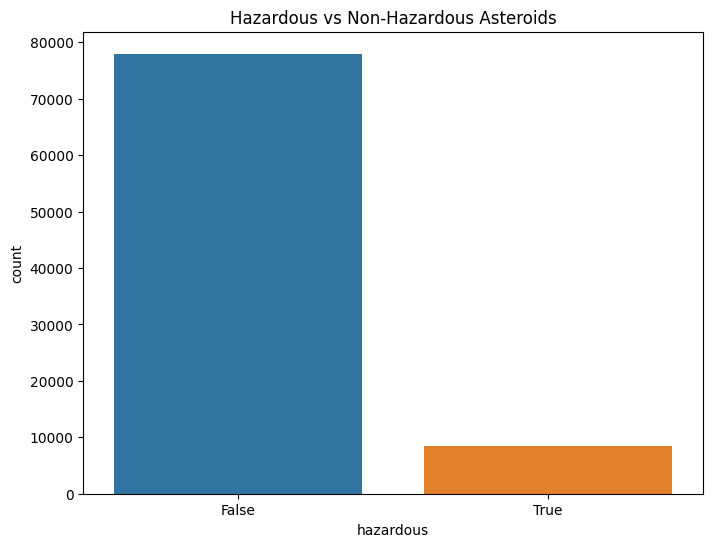

In [15]:
# Distribution of hazardous and non-hazardous asteroids
plt.figure(figsize=(8,6))
sns.countplot(data=df_with_nan, x='hazardous')
plt.title('Hazardous vs Non-Hazardous Asteroids')
plt.show()

4.2. Distribution of asteroid diameters

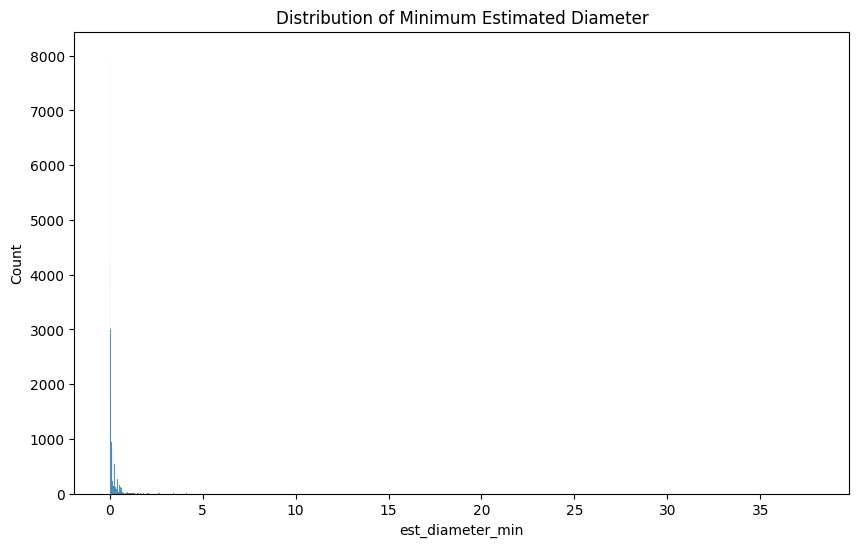

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_with_nan, x='est_diameter_min')
plt.title('Distribution of Minimum Estimated Diameter')
plt.show()

4.3 Relationship between distance and velocity

The graph shows a highly skewed distribution of minimum estimated diameters, with the following key characteristics:

* A sharp peak near zero, reaching approximately 3,000 counts
* A rapid decline in frequency after the peak
* A long right tail extending to about 35 units
* Most measurements concentrated in the 0-5 range
## Technical Details
* X-axis: Estimated minimum diameter (est_diameter_min)
* Y-axis: Count of observations
* Range: 0 to approximately 35 units
* Maximum frequency: ~3,000 observations


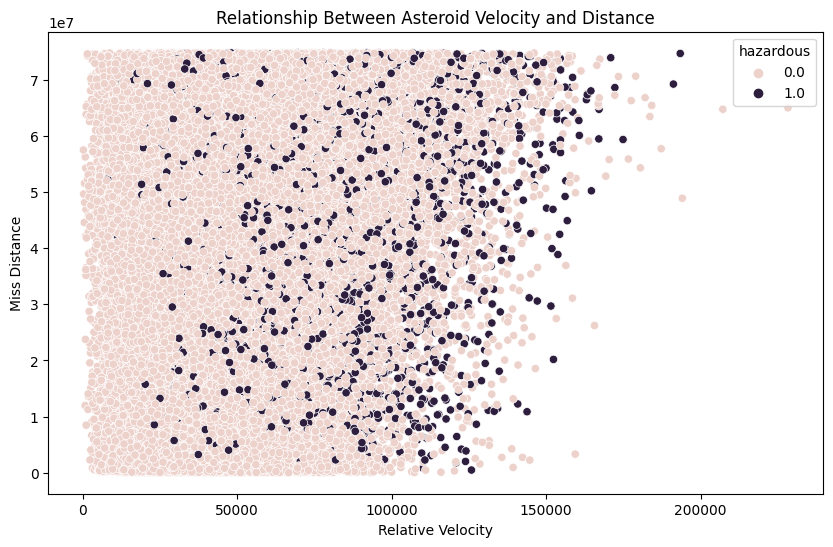

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_with_nan, x='relative_velocity', y='miss_distance', hue='hazardous')
plt.title('Relationship Between Asteroid Velocity and Distance')
plt.xlabel('Relative Velocity')
plt.ylabel('Miss Distance')
plt.show()

4.4 Box Plot Analysis

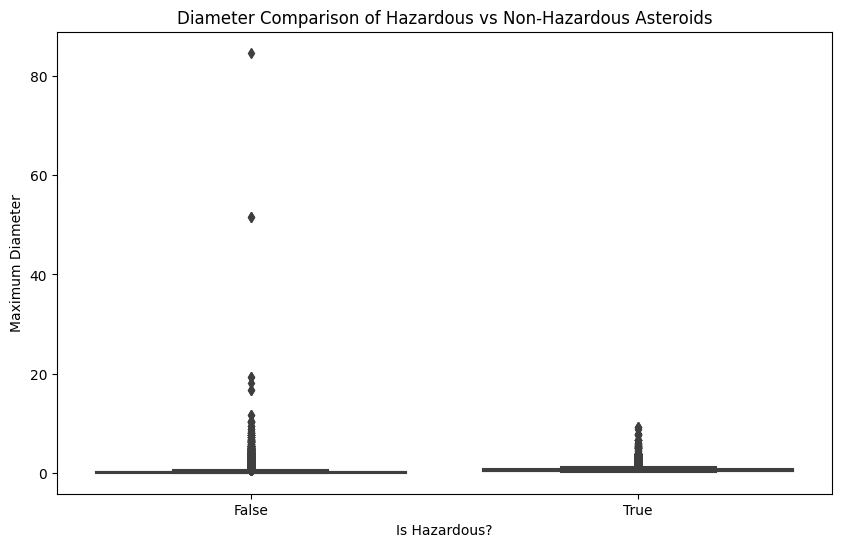

In [23]:
# Diameter comparison of hazardous vs non-hazardous asteroids
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='hazardous', y='est_diameter_max')
plt.title('Diameter Comparison of Hazardous vs Non-Hazardous Asteroids')
plt.xlabel('Is Hazardous?')
plt.ylabel('Maximum Diameter')
plt.show()

# 5. **Correlation Analysis**
     This will show us:
   - Strength of relationships between variables
   - Positive and negative correlations
   - Potential multicollinearity issues
   - Key features that might influence hazard classification

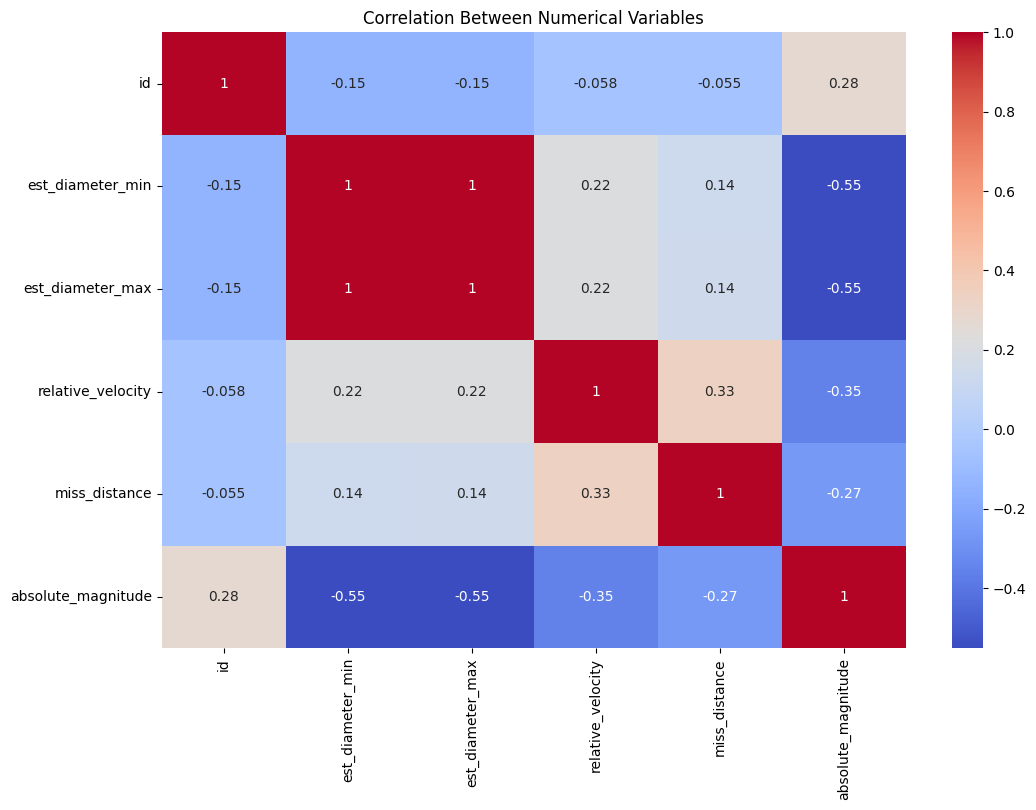

In [17]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_with_nan.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Variables')
plt.show()

## Key Observations from the Correlation Matrix:

### Strong Correlations (|r| > 0.5)
- Perfect correlation (1.0) between est_diameter_min and est_diameter_max
- Strong negative correlation (-0.55) between absolute_magnitude and diameter estimates

### Moderate Correlations (0.2 < |r| < 0.5)
- Relative_velocity and miss_distance show moderate positive correlation (0.33)
- Relative_velocity and diameter measurements have weak positive correlation (0.22)

### Weak Correlations (|r| < 0.2)
- ID shows very weak negative correlations with most variables
- Miss_distance has weak correlations with diameter measurements (0.14)

### Notable Points:
- Most correlations in the dataset are relatively weak
- The strongest relationships are between size-related measurements
- Velocity and distance measurements show some moderatezocmngtfv/cccled.jpg

# 6. Feature Engineering and Data Cleaning

*Missing values in the original dataset (before cleaning)*:

In [20]:
print("Missing values in the original dataset:")
print(df_with_nan.isnull().sum())

Missing values in the original dataset:
id                    4453
name                  4436
est_diameter_min      4471
est_diameter_max      4445
relative_velocity     4408
miss_distance         4402
orbiting_body         4349
sentry_object         4470
absolute_magnitude    4455
hazardous             4423
dtype: int64


Cleaning Process:

In [19]:
# Filling missing values
df_clean = df_with_nan.copy()
# Fill numerical columns with median
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())

Difference between the two datasets:

In [21]:
print("\nNumber of missing values filled after cleaning:")
print(df_with_nan.isnull().sum() - df_clean.isnull().sum())


Number of missing values filled after cleaning:
id                    4453
name                     0
est_diameter_min      4471
est_diameter_max      4445
relative_velocity     4408
miss_distance         4402
orbiting_body            0
sentry_object            0
absolute_magnitude    4455
hazardous                0
dtype: int64


In [24]:
print("Kolonlar:", df.columns.tolist())
print("Toplam değişken sayısı:", len(df.columns))

Kolonlar: ['id', 'name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude', 'hazardous']
Toplam değişken sayısı: 10


In [25]:
print("Kolonlar:", df.columns.tolist())
print("\nToplam değişken sayısı:", len(df.columns))

Kolonlar: ['id', 'name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude', 'hazardous']

Toplam değişken sayısı: 10
